## Prediction Of Covid Cases Using FbProphet

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
import fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Top 5 Countries ranked by Covid Deaths

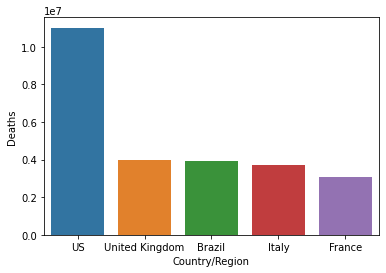

In [ ]:
total_deaths=df.groupby(['Country/Region'])['Deaths'].sum().reset_index()
total_deaths.sort_values('Deaths',ascending=False,inplace=True)
total_deaths = total_deaths.head()
sns.barplot(x=total_deaths['Country/Region'],y=total_deaths['Deaths'])

## Top 5 Countries ranked by Recovered Covid Cases

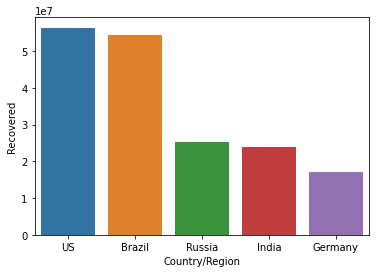

In [ ]:
total_Recovered=df.groupby(['Country/Region'])['Recovered'].sum().reset_index()
total_Recovered.sort_values('Recovered',ascending=False,inplace=True)
total_Recovered = total_Recovered.head()
sns.barplot(x=total_Recovered['Country/Region'],y=total_Recovered['Recovered'])

In [ ]:
df.shape

(49068, 10)

In [ ]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df['Date'].nunique()

188

In [ ]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [ ]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
m=Prophet(daily_seasonality=True,yearly_seasonality=True)

In [ ]:
model=m.fit(df_prophet)

In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0}),
             ('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0}),
             ('daily',
              {'condition_name': None,
               'fourier_order': 4,
               'mode': 'additive',
               'period': 1,
               'prior_scale': 10.0})])

In [ ]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days
future_global=model.make_future_dataframe(periods=30,freq='D')

In [ ]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [ ]:
df_prophet.shape

(188, 5)

In [ ]:
future_global.shape

(218, 1)

In [ ]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [ ]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [ ]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-6.632025e+05,-1.769075e+04,5.508184e+03,-6.632025e+05,-6.632025e+05,6.577998e+05,6.577998e+05,6.577998e+05,-2.658267e+06,-2.658267e+06,-2.658267e+06,-6598.986536,-6598.986536,-6598.986536,3.322666e+06,3.322666e+06,3.322666e+06,0.0,0.0,0.0,-5.402686e+03
1,2020-01-23,-5.790479e+05,-9.762946e+03,1.296022e+04,-5.790479e+05,-5.790479e+05,5.804456e+05,5.804456e+05,5.804456e+05,-2.658267e+06,-2.658267e+06,-2.658267e+06,1052.069131,1052.069131,1052.069131,3.237661e+06,3.237661e+06,3.237661e+06,0.0,0.0,0.0,1.397692e+03
2,2020-01-24,-4.948933e+05,-2.603031e+03,2.008124e+04,-4.948933e+05,-4.948933e+05,5.034426e+05,5.034426e+05,5.034426e+05,-2.658267e+06,-2.658267e+06,-2.658267e+06,8923.585424,8923.585424,8923.585424,3.152786e+06,3.152786e+06,3.152786e+06,0.0,0.0,0.0,8.549330e+03
3,2020-01-25,-4.107387e+05,1.478308e+02,2.324234e+04,-4.107387e+05,-4.107387e+05,4.218376e+05,4.218376e+05,4.218376e+05,-2.658267e+06,-2.658267e+06,-2.658267e+06,11563.705373,11563.705373,11563.705373,3.068541e+06,3.068541e+06,3.068541e+06,0.0,0.0,0.0,1.109890e+04
4,2020-01-26,-3.265841e+05,-7.382512e+03,1.490967e+04,-3.265841e+05,-3.265841e+05,3.303953e+05,3.303953e+05,3.303953e+05,-2.658267e+06,-2.658267e+06,-2.658267e+06,3397.461922,3397.461922,3397.461922,2.985265e+06,2.985265e+06,2.985265e+06,0.0,0.0,0.0,3.811202e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,1.767950e+07,1.316994e+07,1.329888e+07,1.761012e+07,1.774071e+07,-4.441315e+06,-4.441315e+06,-4.441315e+06,-2.658267e+06,-2.658267e+06,-2.658267e+06,11563.705373,11563.705373,11563.705373,-1.794611e+06,-1.794611e+06,-1.794611e+06,0.0,0.0,0.0,1.323818e+07
214,2020-08-23,1.776681e+07,1.254658e+07,1.268838e+07,1.769254e+07,1.783295e+07,-5.146193e+06,-5.146193e+06,-5.146193e+06,-2.658267e+06,-2.658267e+06,-2.658267e+06,3397.461922,3397.461922,3397.461922,-2.491323e+06,-2.491323e+06,-2.491323e+06,0.0,0.0,0.0,1.262061e+07
215,2020-08-24,1.785412e+07,1.191691e+07,1.207013e+07,1.777481e+07,1.792513e+07,-5.857683e+06,-5.857683e+06,-5.857683e+06,-2.658267e+06,-2.658267e+06,-2.658267e+06,-8281.348474,-8281.348474,-8281.348474,-3.191135e+06,-3.191135e+06,-3.191135e+06,0.0,0.0,0.0,1.199643e+07
216,2020-08-25,1.794143e+07,1.130430e+07,1.146296e+07,1.785929e+07,1.801610e+07,-6.553639e+06,-6.553639e+06,-6.553639e+06,-2.658267e+06,-2.658267e+06,-2.658267e+06,-10056.486838,-10056.486838,-10056.486838,-3.885315e+06,-3.885315e+06,-3.885315e+06,0.0,0.0,0.0,1.138779e+07


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,1.323818e+07,1.316994e+07,1.329888e+07
214,2020-08-23,1.262061e+07,1.254658e+07,1.268838e+07
215,2020-08-24,1.199643e+07,1.191691e+07,1.207013e+07
216,2020-08-25,1.138779e+07,1.130430e+07,1.146296e+07
217,2020-08-26,1.079914e+07,1.071181e+07,1.087892e+07


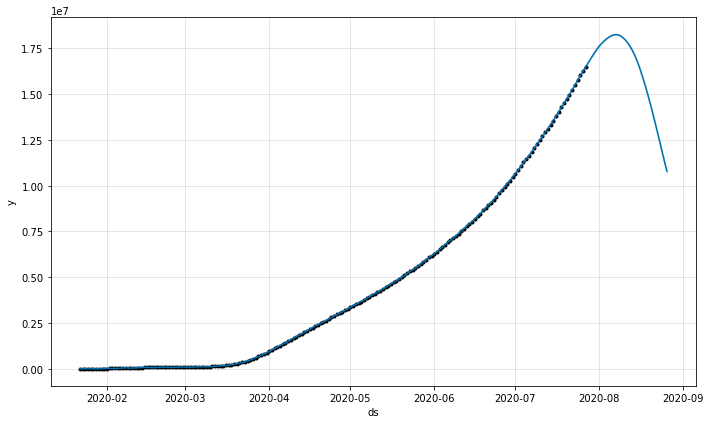

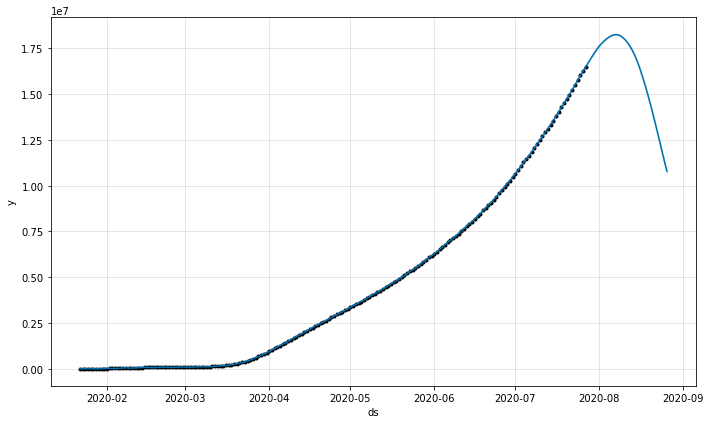

In [ ]:
#### plot the predictions u will see these are with respect to yhat
model.plot(prediction)

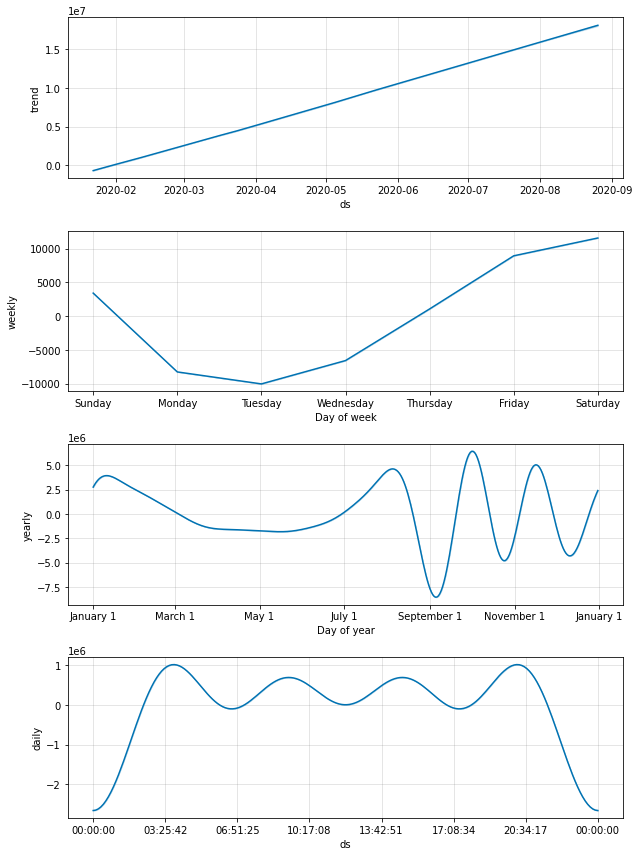

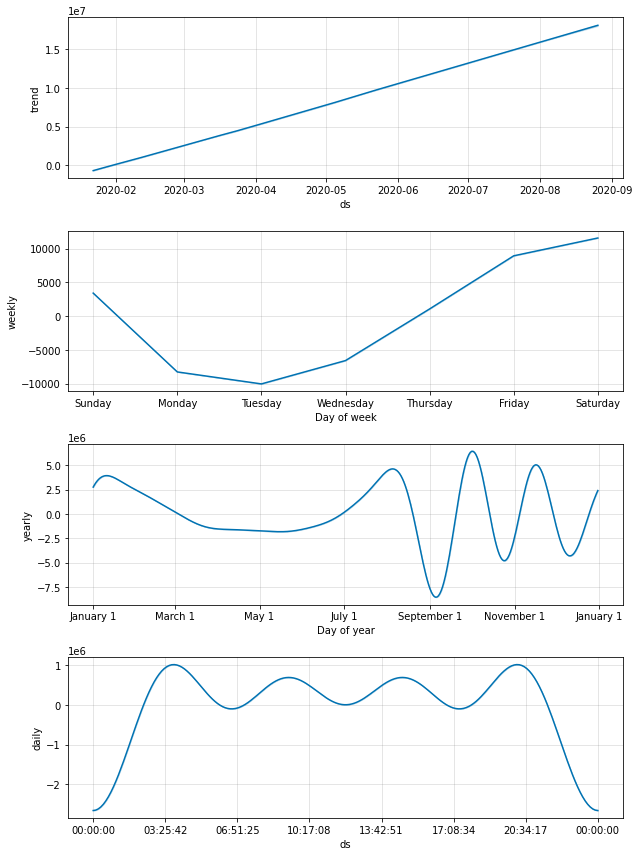

In [ ]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

In [ ]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot

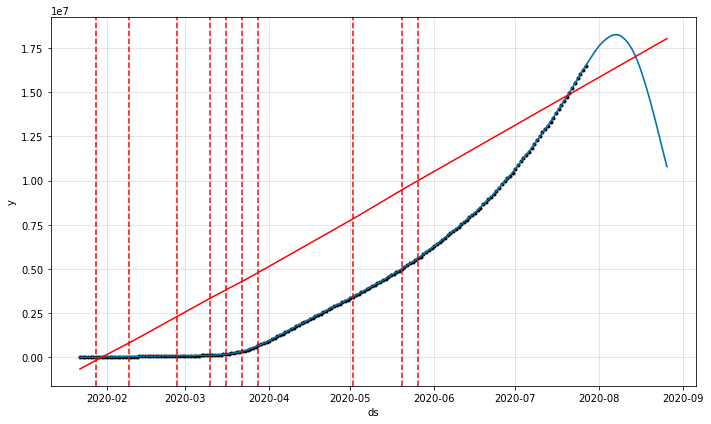

In [ ]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.180573e+06,3.176463e+06,3.184844e+06,3185195,2020-04-28
1,2020-04-30,3.253741e+06,3.249592e+06,3.257822e+06,3268876,2020-04-28
2,2020-05-01,3.322668e+06,3.318113e+06,3.327013e+06,3355922,2020-04-28
3,2020-05-02,3.384776e+06,3.379953e+06,3.389192e+06,3437608,2020-04-28
4,2020-05-03,3.442155e+06,3.436753e+06,3.447013e+06,3515244,2020-04-28


In [ ]:
df_cv.shape

(150, 6)

#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.053921e+09,45320.207202,35985.526753,0.006067,0.004630,0.0
1,4 days,3.718658e+09,60980.796159,51807.187823,0.008959,0.006297,0.0
2,5 days,6.528630e+09,80799.939672,67866.334668,0.011986,0.010393,0.0
3,6 days,1.136875e+10,106624.317175,87360.691703,0.015567,0.015369,0.0
4,7 days,2.062456e+10,143612.527529,117876.111294,0.020688,0.020792,0.0


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

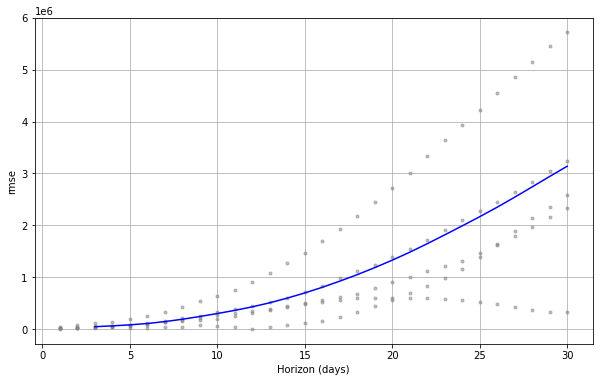

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

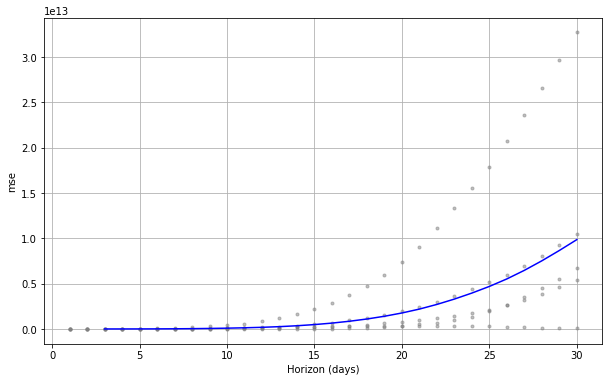

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

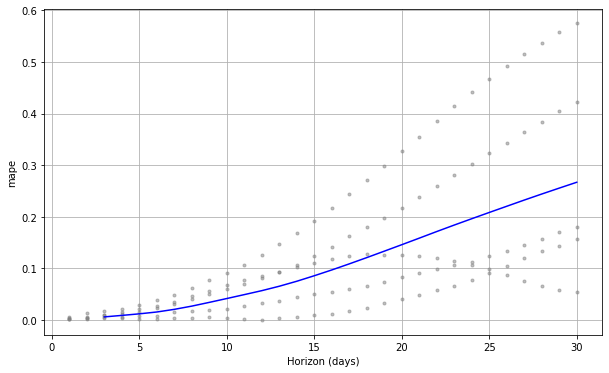

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')